# Convergence analysis after RHS bug-fix

In this notebook we present the convergence analysis for the case of a sensor and 1 protein (Figure 7 on paper). We can see that, after the bug-fix on the RHS function, the order of convergence is not affected. 

In [1]:
import numpy
import pickle
import convergence_helper 
from matplotlib import pyplot, rcParams
%matplotlib inline

### General information about computations. 

**Parameters used for convergence analysis:** 
```
Precision   double
K           4
Nk          9  
K_fine      37
thresold    0.5
BSZ         128
restart     100
tolerance   1e-5
max_iter    1000
P           15
eps         1e-12
NCRIT       500
theta       0.5   
GPU         1
```

# BSA sensor system

Convergence analysis of a silver spherical sensor of radius 8 nm with a Bovine Serum Albumina (BSA) protein located at 1 nm of distance in the `z` direction. 

We selected a constant density of 2 triangles per Angstrom square for the protein mesh, while varying the density of the spherical sensor (512, 2048, 8192, 32768 elements). We computed the order of convergence and Richardson extarpolation using the 3 finest meshes, and calculated the respective relative errors. 
Problem parameters:

* Metal    : Silver (Ag). (In water at room temeprature)
* Radius   : 8 nm
* Wavelength: 380 nm

Values of dielectric constants obtained by interpolation:

* Water dielectric: 1.79721+8.50477e-09j
* Silver dielectric: -3.38765+0.19221j
* Protein dielectric: 2.75143+0.28602j


### Loading results data

In [2]:
res_bsa_sph = convergence_helper.pickleload('data/rhs_fix_convergence/sphere_bsa_convergence.pickle')

In [3]:
res_bsa_sph

{'sphere_bsa': {'N': array([  98628.,  100164.,  106308.,  130884.]),
  'iterations': array([ 110.,  106.,  108.,  123.]),
  'expected_rate': 0,
  'Cext_0': array([ 2306.18473156,  1908.9072617 ,  1814.08172336,  1789.8976739 ]),
  'Time': array([ 5859.85506034,  5739.2496798 ,  6131.19562221,  8464.7072444 ]),
  'error': array([ 0.29443257,  0.07144571,  0.01822132,  0.00464712]),
  'rich_extra': 1781.6182865709523}}

The values for the case of the paper were:
```
{'sphere_bsa': {'Cext_0': array([ 2301.56988701,  1905.62523724,  1811.09373056,  1786.98185102]),
  'N': array([  98628.,  100164.,  106308.,  130884.]),
  'Time': array([ 8232.30674219,  8231.11177182,  7656.23715186,  9579.5464294 ]),
  'error': array([ 0.293943  ,  0.07134284,  0.01819721,  0.00464151]),
  'expected_rate': 0,
  'iterations': array([ 136.,  134.,  119.,  123.]),
  'rich_extra': 1778.725875259727}}
```

In [4]:
num_elements_bsa = numpy.array([   512.,   2048.,   8192.,  32768.]) # We use the refinement of the sphere, since we measure on it.
C_ext_bsa = res_bsa_sph['sphere_bsa']['Cext_0']
rate_bsa = 4 # rate of refinement of the sphere since we measure on the sphere. We don't refine the protein mesh  
rel_err_bsa = res_bsa_sph['sphere_bsa']['error']

### Computing order of convergence

In [5]:
ord_conv_bsa = convergence_helper.ord_convergence(C_ext_bsa, 4)
print('The order of convergence obtained using meshes of 2k, 8k, and 32k elements is {:.2f}'.format(ord_conv_bsa))

The order of convergence obtained using meshes of 2k, 8k, and 32k elements is 0.99


### Generating plot

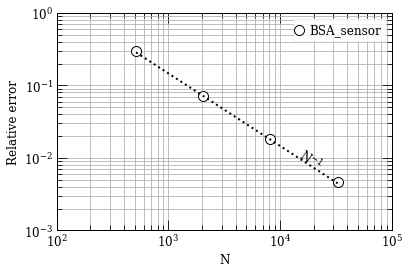

In [6]:
convergence_helper.plot_sph_complex_convergence(num_elements_bsa, rel_err_bsa)